In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
df = pd.read_csv('ay.csv')
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,5-1-99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5-1-99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5-1-99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5-1-99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5-1-99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [3]:
label_encoder = preprocessing.LabelEncoder() 
df['time'] = label_encoder.fit_transform(df['time'])
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,0,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,2,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,3,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,4,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [4]:
df.shape

(18398, 62)

In [5]:
df.info

<bound method DataFrame.info of         time  y        x1        x2        x3          x4        x5  \
0          0  0  0.376665 -4.596435 -4.095756   13.497687 -0.118830   
1          1  0  0.475720 -4.542502 -4.018359   16.230659 -0.128733   
2          2  0  0.363848 -4.681394 -4.353147   14.127997 -0.138636   
3          3  0  0.301590 -4.758934 -4.023612   13.161566 -0.148142   
4          4  0  0.265578 -4.749928 -4.333150   15.267340 -0.155314   
...      ... ..       ...       ...       ...         ...       ...   
18393  13593  0 -0.877441  0.786430  0.406426  135.301215  0.112295   
18394  13829  0 -0.843988  0.633086  0.561918  133.228949  0.141332   
18395  13830  0 -0.826547  0.450126  0.334582  134.977973  0.170370   
18396  13831  0 -0.822843  0.419383  0.387263  135.658942  0.199422   
18397  13832  0 -0.840981  0.582710  0.593416  136.339880  0.228460   

              x6        x7        x8  ...        x51        x52       x54  \
0     -20.669883  0.000732 -0.061114  

In [6]:
df['time'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
18393    False
18394    False
18395    False
18396    False
18397    False
Name: time, Length: 18398, dtype: bool

In [7]:
df['time'].value_counts()

time
0        1
7998     1
8004     1
8003     1
8002     1
        ..
1291     1
1292     1
1293     1
1294     1
13832    1
Name: count, Length: 18398, dtype: int64

In [8]:
df['time'].value_counts(normalize =True)

time
0        0.000054
7998     0.000054
8004     0.000054
8003     0.000054
8002     0.000054
           ...   
1291     0.000054
1292     0.000054
1293     0.000054
1294     0.000054
13832    0.000054
Name: proportion, Length: 18398, dtype: float64

In [9]:
df.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,9198.500000,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
std,5311.189462,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120
min,0.000000,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,4599.250000,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,9198.500000,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,13797.750000,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,18397.000000,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000


In [10]:
df['time'].value_counts()

time
0        1
7998     1
8004     1
8003     1
8002     1
        ..
1291     1
1292     1
1293     1
1294     1
13832    1
Name: count, Length: 18398, dtype: int64

<Axes: xlabel='time', ylabel='Count'>

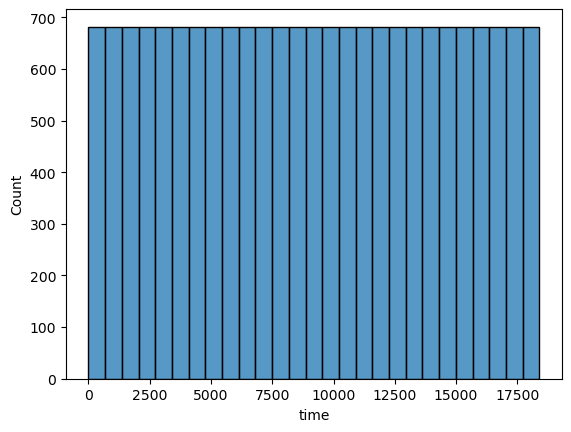

In [11]:
sns.histplot(df['time'])

In [12]:
df.groupby('time')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
3,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
4,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...
18393,1.0,18393.0,NaN,18393.0,18393.0,18393.0,18393.0,18393.0
18394,1.0,18394.0,NaN,18394.0,18394.0,18394.0,18394.0,18394.0
18395,1.0,18395.0,NaN,18395.0,18395.0,18395.0,18395.0,18395.0
